# Data Analysis of Breath Alcohol Tests with R 

In [2]:
install.packages('tidyverse')

Installing package into 'C:/Users/sxw17/Documents/R/win-library/3.5'
(as 'lib' is unspecified)

Warning message:
"package 'tidyverse' is in use and will not be installed"


##  Breath alcohol tests in Ames, Iowa, USA

In [3]:
# load the tidyverse suite of packages 
library(tidyverse)

# read the data into your workspace
ba_data <- read_csv("breath_alcohol_ames.csv")

# quickly inspect the data
head(ba_data)

# obtain counts for each year 
ba_year <- ba_data %>%
            count(year)

Parsed with column specification:
cols(
  year = col_double(),
  month = col_double(),
  day = col_double(),
  hour = col_double(),
  location = col_character(),
  gender = col_character(),
  Res1 = col_double(),
  Res2 = col_double()
)



year,month,day,hour,location,gender,Res1,Res2
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
2017,12,17,1,Ames PD,M,0.046,0.046
2017,12,14,3,ISU PD,F,0.121,0.120
2017,12,10,5,ISU PD,F,0.068,0.067
2017,12,10,3,ISU PD,F,0.077,0.077
2017,12,9,2,ISU PD,M,0.085,0.084
2017,12,9,1,Ames PD,M,0.160,0.161


##  2. What is the busiest police department

In [4]:
# use count to tally up the totals for each department
pds <- ba_data %>%
        group_by(location)%>%
        count()

# 3. Nothing Good Happens after 2am

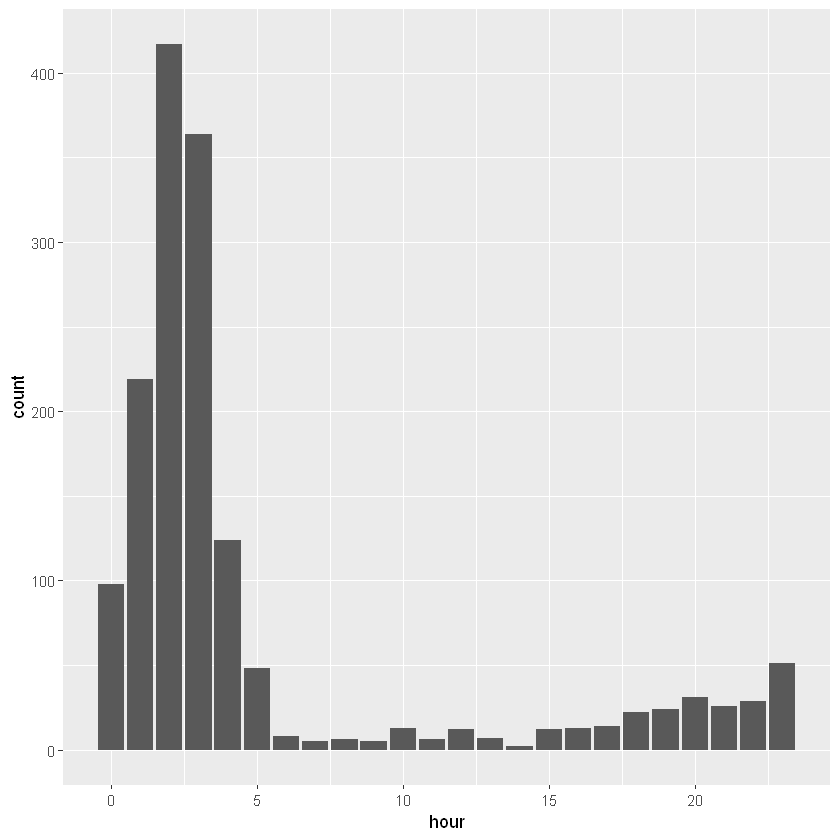

In [5]:

# count by hour and arrange by descending frequency
hourly <- ba_data %>%
            count(hour)%>%
            arrange(desc(n))

# use a geom_ to create the appropriate bar chart
ggplot(hourly, aes(hour, weight=n)) + geom_bar()

## 4. Breathalyzer tests by month

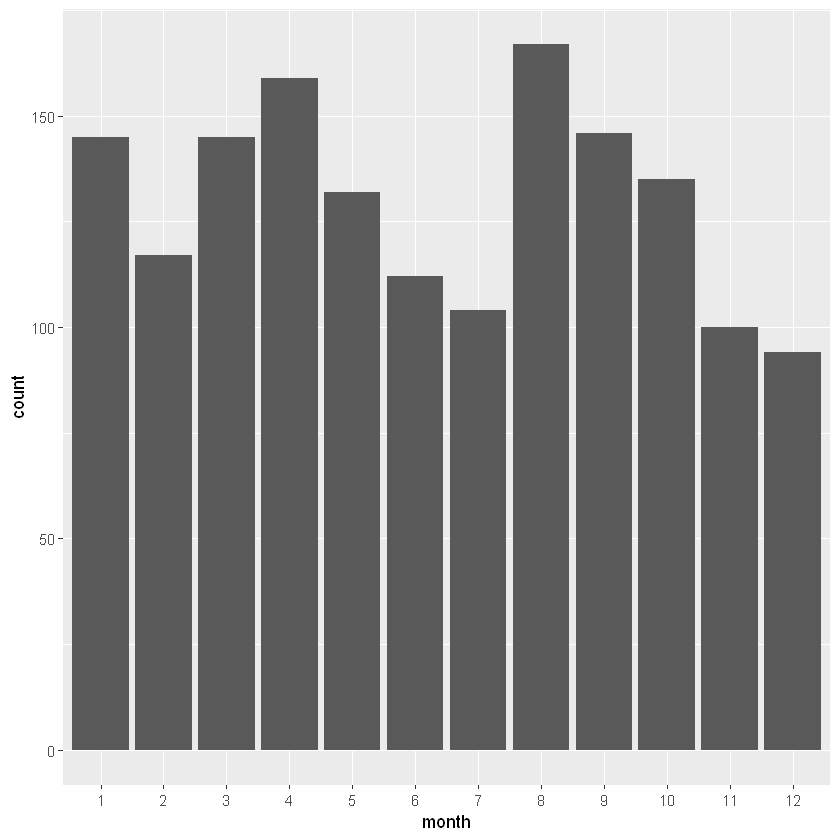

In [6]:

# count by month and arrange by descending frequency
monthly <- ba_data %>%
            count(month) %>%
            arrange(desc(n))

# make month a factor
monthly$month <- as.factor(monthly$month)

# use a geom_ to create the appropriate bar chart
ggplot(monthly, aes(month, weight=n)) + geom_bar()

## 5. COLLEGE

gender,n
<chr>,<int>
F,425
M,1102
NA,29


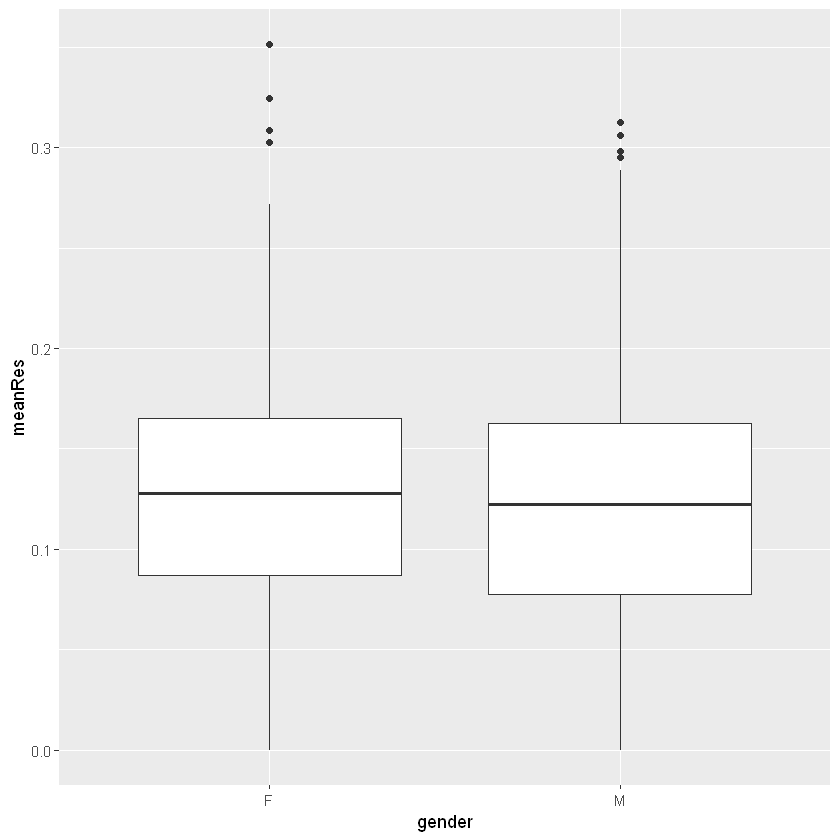

In [7]:
# count by gender 
ba_data %>% count(gender)

# create a dataset with no NAs in gender 
clean_gender <- ba_data %>%
                filter(!is.na(gender))
# create a mean test result variable and save as mean_bas
mean_bas <- clean_gender %>%
            mutate(meanRes = (Res1 + Res2)/2)

# create side-by-side boxplots to compare the mean blood alcohol levels of men and women
ggplot(mean_bas, aes(gender, y=meanRes)) + geom_boxplot()

## 6. Above the legal limit

In [9]:
# Filter the data
duis <- ba_data %>%
        filter(Res1 > 0.08 | Res2 > 0.08)

# proportion of tests that would have resulted in a DUI
p_dui <- nrow(duis) / nrow(ba_data)

p_dui

[1] 0.7448586

## 7. Breathalyzer tests: is there a pattern over time?

In [10]:

library(lubridate) 

# Create date variable using paste() and ymd()
ba_data <- ba_data %>% mutate(date = ymd(paste(year, month, day)))

# Create a week variable using week()
ba_data <- ba_data %>% mutate(week = week(date))

ba_data


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date




year,month,day,hour,location,gender,Res1,Res2,date,week
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>
2017,12,17,1,Ames PD,M,0.046,0.046,2017-12-17,51
2017,12,14,3,ISU PD,F,0.121,0.120,2017-12-14,50
2017,12,10,5,ISU PD,F,0.068,0.067,2017-12-10,50
2017,12,10,3,ISU PD,F,0.077,0.077,2017-12-10,50
2017,12,9,2,ISU PD,M,0.085,0.084,2017-12-09,49
2017,12,9,1,Ames PD,M,0.160,0.161,2017-12-09,49
2017,12,7,3,Ames PD,M,0.131,0.131,2017-12-07,49
2017,12,4,1,ISU PD,M,0.000,0.000,2017-12-04,49
2017,12,3,1,Ames PD,M,0.091,0.090,2017-12-03,49


## 8. Looking at timelines

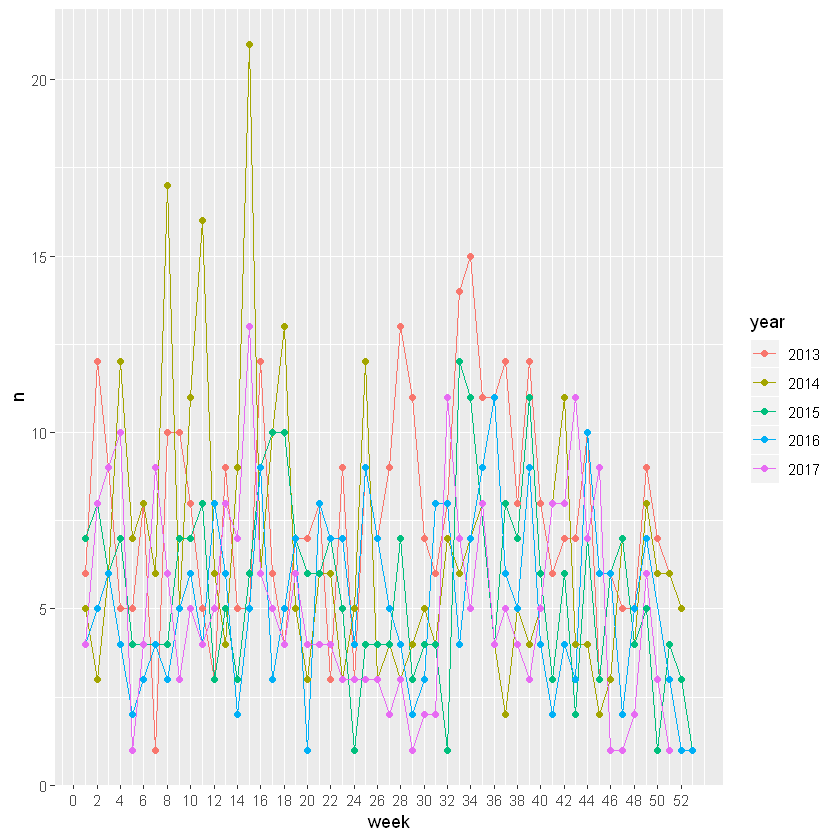

In [11]:
# create the weekly data set 
weekly <- ba_data %>%
            group_by(year, week) %>%
            count()

# uncomment and run the following line
weekly <- weekly %>% ungroup() # ungroup is necessary for the plot later

# make year a factor
weekly <- weekly %>% mutate(year = as.factor(year))

# create the time series plot with one line for each year
ggplot(weekly, aes(x = week, y = n, color=year)) + geom_line() +
  geom_point(aes(color = year)) +  # included to make the plot more readable 
  scale_x_continuous(breaks = seq(0,52,2))  # to make the x-axis more readable

## 9. The end of VEISHEA

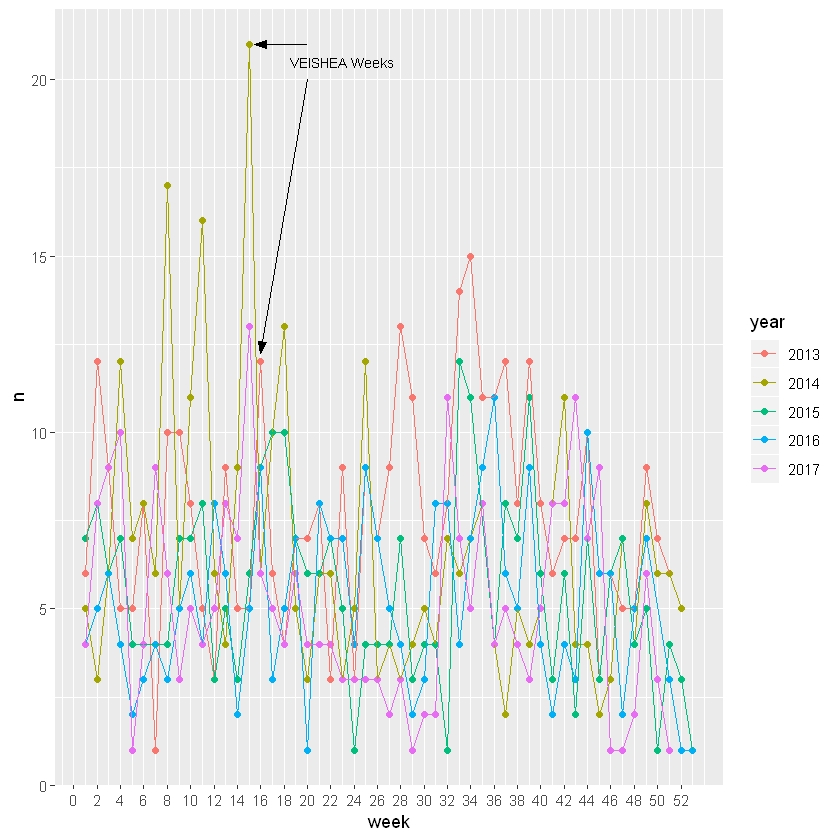

In [12]:
## Run this code to create the plot 
ggplot() + 
  geom_point(data = weekly, aes(x = week, y = n, color = year)) + 
  geom_line(data = weekly, aes(x = week, y = n, color = year)) +  # included to make the plot more readable 
  geom_segment(data = NULL, arrow = arrow(angle = 20, length = unit(0.1, "inches"),
                                          ends = "last", type = "closed"), 
               aes(x = c(20,20), xend = c(15.5,16), y = c(21, 20), yend = c(21, 12.25))) + 
  geom_text(data = NULL, aes(x = 23, y = 20.5, label = "VEISHEA Weeks"), size = 3) + 
  scale_x_continuous(breaks = seq(0,52,2)) 

## Make a decision about VEISHEA. TRUE or FALSE?  
cancelling_VEISHEA_was_right <- TRUE